In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import latexify as lt

In [2]:
data = pd.read_csv('daily-pm25-and-tweets.csv', index_col='time');
data.index = pd.to_datetime(data.index)
data = data.dropna()

In [3]:
data.head(2)

,PM2.5,freq
time,,
2016-03-03,136.700,65.0
2016-03-04,62.825,71.0


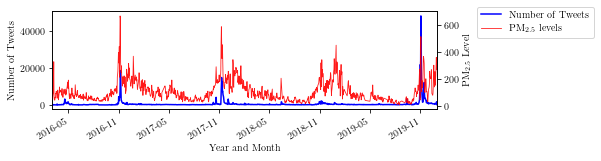

In [26]:
#data.index = data.index.strftime("%Y-%m")
#ax = data.plot()

lt.latexify(columns=2, fig_height=2)
#Lets just plot now
fig, ax = plt.subplots()

y1 = data['freq'].plot(ax=ax, style='b-', label='Number of Tweets')
y2 = data['PM2.5'].plot(ax=ax, style='r-', secondary_y=True, label=r'PM$_{2.5}$ levels', alpha=0.9, linewidth=0.8)

y1.set_ylabel("Number of Tweets", fontsize=10)
y2.set_ylabel("PM$_{2.5}$ Level",fontsize=10)
y1.set_xlabel("Year and Month",fontsize=10)

y1.tick_params(axis='both', which='both', labelsize=10)
y2.tick_params(axis='both', which='both', labelsize=10)

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
#lt.format_axes(ax)
plt.legend(handles,labels, prop={'size': 10}, bbox_to_anchor=[1.42, 1.1])
#plt.figure()
plt.savefig('pm-vs-tweet.pdf',bbox_inches='tight')